# Errors

Sampling errors
- Accidental sampling error
Steekproef met per ongeluk een vertekende steekproef
- Non accidental error
Systematisch dezelfde elementen nemen of bepaalde groep uitsluiten
(niet iedereen heeft evenveel kans om gekozen te worden)

Non-sampling errors
- Accidentanl non-sampling error
vb respondent begrijpt de vraag niet goed en antwoordt verkeerd
- Systematic non-sampling error
Respondenten antwoorden bewust verkeerd


In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

/tmp/ipykernel_3072/48876594.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                 # Data Frame


In [13]:
# Load the XLSX file into a DataFrame
data = pd.read_excel('https://github.com/HoGentTIN/dsai-labs/raw/main/data/belgian_population.xlsx')
data.head()

,Age,Women_Unmarried,Men_Unmarried,Women_Married,Men_Married,Women_Widowed,Men_Widowed,Women_Divorced,Men_Divorced
0,0,55736,58323,NaN,NaN,NaN,NaN,NaN,NaN
1,1,58676,61395,NaN,NaN,NaN,NaN,NaN,NaN
2,2,57171,59793,NaN,NaN,NaN,NaN,NaN,NaN
3,3,59316,61471,NaN,NaN,NaN,NaN,NaN,NaN
4,4,60023,62562,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#replace NaN in dataset:
data.fillna(0,inplace=True)

In [ ]:
# Replace NaN with 0 in specific columns only
data[['column1', 'column2']] = data[['column1', 'column2']].fillna(0)

In [ ]:
# Add a column (that sums other columns) to your dataset 
data['Number_of_Women'] = data[['Women_Unmarried','Women_Married','Women_Widowed','Women_Divorced']].sum(axis=1)
data.head()

In [ ]:
# Sum all numbers of a column
total_number_of_women = data.Number_of_Women.sum()
print(total_number_of_women)

In [8]:
# Number of rows:
print(f"Number of rows: {len(data)}")
# Number of columns
print(f"Number of columns: {len(data.columns)}")
# Shape of the data frame
print(f"The shape (columns & rows) of the data frame is : {data.shape}")
# General information (number of empty fields & type of each variable)
print(data.info())
# Show only the datatypes
print(data.dtypes)
# How many elements of each type
print(data.dtypes.value_counts())
# Measurement level: nominal, ordinal, interval, ratio


Number of rows: 101
Number of columns: 9
The shape (columns & rows) of the data frame is : (101, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              101 non-null    int64  
 1   Women_Unmarried  101 non-null    int64  
 2   Men_Unmarried    101 non-null    int64  
 3   Women_Married    85 non-null     float64
 4   Men_Married      83 non-null     float64
 5   Women_Widowed    80 non-null     float64
 6   Men_Widowed      78 non-null     float64
 7   Women_Divorced   81 non-null     float64
 8   Men_Divorced     80 non-null     float64
dtypes: float64(6), int64(3)
memory usage: 7.2 KB
None
Age                  int64
Women_Unmarried      int64
Men_Unmarried        int64
Women_Married      float64
Men_Married        float64
Women_Widowed      float64
Men_Widowed        float64
Women_Divorced     float64
Men_Divorced       

In [9]:
# Set a column (age here) as index
data.set_index(['Age'])

,Women_Unmarried,Men_Unmarried,Women_Married,Men_Married,Women_Widowed,Men_Widowed,Women_Divorced,Men_Divorced
Age,,,,,,,,
0,55736,58323,NaN,NaN,NaN,NaN,NaN,NaN
1,58676,61395,NaN,NaN,NaN,NaN,NaN,NaN
2,57171,59793,NaN,NaN,NaN,NaN,NaN,NaN
3,59316,61471,NaN,NaN,NaN,NaN,NaN,NaN
4,60023,62562,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
96,287,68,136.0,417.0,4152.0,953.0,175.0,33.0
97,235,41,78.0,259.0,3016.0,659.0,144.0,23.0
98,159,29,51.0,138.0,2133.0,419.0,75.0,14.0


In [11]:
# Change the type of column ex. object to a category (qualitative variables)
# data.sex = data.sex.astype('category')
# Get info of a column
print(data.Men_Married.describe())

count       83.000000
mean     24470.602410
std      17136.041174
min         10.000000
25%       6437.000000
50%      27395.000000
75%      39579.000000
max      49080.000000
Name: Men_Married, dtype: float64


In [23]:
# Select only the second row:
data.iloc[2]
# Select row 4 to 6
data.iloc[4:7]
# Select column 3 to 6
data.iloc[:,3:7]
# Retrieve 1 column by name
data.Women_Widowed
# Observations where married women above 40K
data[data.Women_Married > 40000]
# Observations where widowed men above 5K, only show men married
data[data.Men_Widowed > 5000].Men_Married


84    15412.0
85    13381.0
Name: Men_Married, dtype: float64

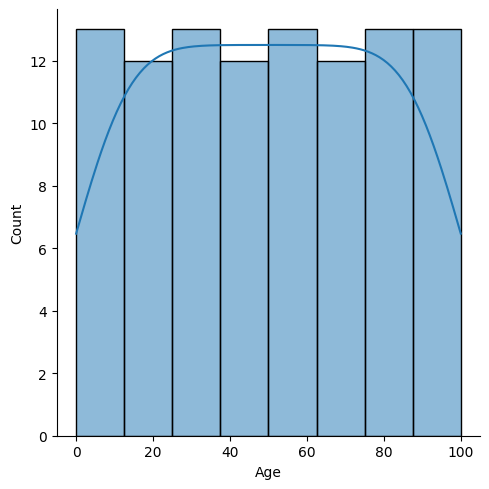

In [17]:
sns.displot(x=data.Age, kde=True)

In [3]:
#Omzetting numerieke data naar categorische variabelen vb leeftijd
data = {'Age': [23, 45, 18, 36, 67, 15, 30]}
df = pd.DataFrame(data)

# We kunnen de leeftijden omzetten naar leeftijdscategorieën
#pd.cut functie gebruikt om de 'Age' kolom te verdelen in de opgegeven 'bins' en deze te labelen met de opgegeven 'labels'.
#'AgeCategory' bevat nu de categorische representatie van de leeftijden.
bins = [0, 18, 35, 65, 100]
labels = ['0-18', '19-35', '36-65', '65+']
df['AgeCategory'] = pd.cut(df['Age'], bins=bins, labels=labels)

print(df)

   Age AgeCategory
0   23       19-35
1   45       36-65
2   18        0-18
3   36       36-65
4   67         65+
5   15        0-18
6   30       19-35


In [3]:
#Omzetting niet-numerieke data naar categorische variabelen vb kleur
data = {'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue']}
df = pd.DataFrame(data)

# We kunnen de 'Color' kolom omzetten naar een categorisch type
df['Color'] = df['Color'].astype('category')

print(df['Color'].dtype)  # Output: category

category


In [ ]:
#Omzetting niet-numerieke data naar geordende categorische variabelen vb diploma
data = {'EducationLevel': ['Bachelor', 'High School', 'Master', 'PhD', 'Bachelor']}
df = pd.DataFrame(data)

# Definieer de volgorde van de categorieën
cat_type = CategoricalDtype(categories=['High School', 'Bachelor', 'Master', 'PhD'], ordered=True)

# Zet de 'EducationLevel' kolom om naar een geordende categorische variabele
df['EducationLevel'] = df['EducationLevel'].astype(cat_type)

print(df['EducationLevel'])
#stelt je in staat om vergelijkingen en sorteringen uit te voeren die de gedefinieerde volgorde respecteren.


In [ ]:
# Drop rows in a dataset (the first three rows here)
df_dropped = df.iloc[3:]

# If you want to reset the index after dropping
df_dropped.reset_index(drop=True, inplace=True)


Alle unieke waarden van 1 kolom

df.gender.unique() => M & V

Lege waarden invullen

df.filla(0,inplace=True)

H3 
- right tailed z test
- Left tailed z test
- two tailed z test
- right tailed t test
- left tailed t test
- two tailed t test

H4: Bivariate-qual:
Onafhankelijke & afhankelijke veranderelijke: Kwalitatieve variabelen (tekstuele variabelen)
- Chi kwadraat test
- Goodness of fit test

H5: Bivariate analyse qual-quant
Onafhankelijk veranderelijke = kwalitatieve variabele
EN afhankelijke veranderlijke = kwantitatieve variabele
- two sample t-test
   - independent two sample t-test: Vergelijking tussen 2 verschillende groepen
   - paired sample t-test: Vergelijking éénzelfde groep bijv. voor en na behandeling

H6: Regressie analyse:
Onafhankelijke & afhankelijke veranderelijke: kwantitatieve variabelen
- Best benaderende rechte?

Hoe berekenen?
x = ...
y = ...
a, b = np.polyfit(x, y, 1)
y = ax + b

3 metrieken: 

1) covariantie --> Positief = stijgend verband; negatief = dalend verband

2) Correlatie 
- Positief = stijgend verband; negatief = dalend verband
- Dicht bij 1 = sterk verband; dicht bij 0 = zwak verband

3) R²
- Dicht bij 1 = sterk verband; dicht bij 0 = zwak verband
- ... % van de variantie van de afhankelijk veranderlijke wordt bepaald door de onafhankelijk veranderlijke
